In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img = Image.open("test.jpg")

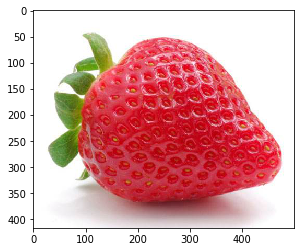

In [3]:
plt.imshow(img)
plt.show()

In [4]:
# image -> ndarray
img_data = np.array(img)

In [5]:
h,w,ch = img_data.shape #高，宽，通道(RGB)
print(h,w,ch)

417 500 3


In [6]:
# h, w, ch -> ch, h, w
img_data1 = img_data.transpose(2,0,1)

In [7]:
# 第一通道
img_data1[0].shape

(417, 500)

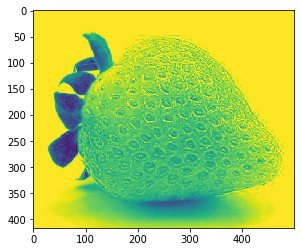

In [8]:
# 显示第一个通道
plt.imshow(img_data1[0])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


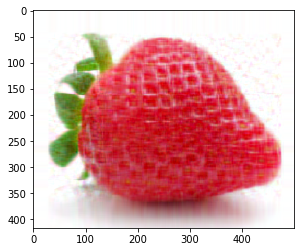

In [18]:
from numpy.linalg import svd
# 取最大的特征个数
topn = 20
results = []
for chn in range(ch): # 逐个通道处理
    chn_img = img_data1[chn]
    u, s, vh = np.linalg.svd(chn_img) # svd分解
    chn_img_zip = np.zeros((h,w))
    for i in range(topn):
        ui = u[:,i] # U特征向量
        si = s[i]   # D特征值
        vhi = vh[i] # V特征向量
        chn_img_zip += si*np.matmul(ui.reshape(h,1),vhi.reshape(1,w))
    results.append(chn_img_zip)
img_zip = np.stack(results) # 三个通道堆叠 ch*w*h
img_zip = img_zip.transpose(1,2,0)/255  # ch*w*h* -> w*h*ch
plt.imshow(img_zip)

In [19]:
# 压缩比率
topn*(h+w+1) / (h*w)

0.08805755395683454